In [2]:
import psi4
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg as splinalg
import time

## What factors limit the accuracy of the Hartree-Fock Method?

Hartree-Fock theory is able to successfully capture ca. 95% of the true energy (or our best approximation of it) for almost all systems. Most chemical predictions, however, require the remainder to be accurate. 


### Pre-experimental Questions: Part One

1. Write the electron configuration you would expect for H$_2$ in terms of $\sigma$ and $\sigma^*$ orbitals in the ground-state. Is this state a singlet or triplet? <br><br>

2. Individually: Write an excited-state electron configuration for H$_2$. <br><br>

3. As a team: Compare your answers and decide which excited-state configuration would be the lowest energy excited state (i.e. the first excited state). Is this state a singlet or triplet? <br><br>

4. How do you expect the energy gap between the ground and first-excited states to change as a function of $r_{AB}$? <br><br>

5. In the limit $r_{AB}\rightarrow\infty$, will you observe a difference in the energy of singlet and triplet states? Why or why not? <br><br>

6. Based on the energy for a single, isolated H-atom in Eh, what energy should the H$_2$ calculation converge to as $r_{AB}$ increases?

### Experiement: Part One

A. As a class, decide an approximate range of $r_{AB}$ in atomic units and assign a different basis set to each team. 

B. Use the following code to create an H$_2$ molecule and assign a list of $r_{AB}$ values in atomic units.

In [3]:
# singlet H2 has a charge of 0, spin multiplicity of 1 
h2_singlet = """
0 1
H 
H 1 **R**
"""

rAB = [0.4, 0.45, 0.5, 0.6, 0.75, 1, 1.2, 1.5, 2, 3, 4, 5, 6] 
                           
print(rAB)

[0.4, 0.45, 0.5, 0.6, 0.75, 1, 1.2, 1.5, 2, 3, 4, 5, 6]


C. Use the following code to compute the energy of H$_2$ for each value of $r_{AB}$. Use this plot to adjust the the values of $r_{AB}$ above in order to best capture the potential energy surface (PES).

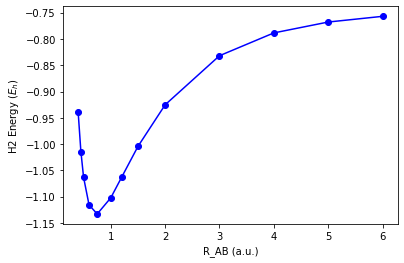

In [4]:
# method
method = 'SCF'

# basis set
basis = 'cc-pvtz'

# set computation options
psi4.set_options({'basis': basis,
                  'reference': 'rohf'})


mols = [psi4.geometry(h2_singlet.replace("**R**", str(r))) for r in rAB] 

e_singlet = [psi4.energy(method, molecule=mol) for mol in mols]

psi4.core.clean()

plt.plot(rAB, e_singlet, linestyle='-', marker='o', color='b') 
plt.xlabel('R_AB (a.u.)')
plt.ylabel('H2 Energy ($E_h$)')
plt.show()

D. Add code below to calculate the energies for the first excited state of H$_2$ and create a single plot of the PES of both the singlet and triplet states.

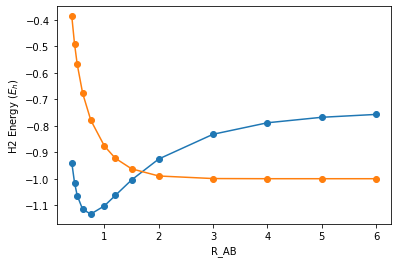

In [5]:
h2_triplet = """
0 3
H 
H 1 **R**
"""

mols = [psi4.geometry(h2_triplet.replace("**R**", str(r))) for r in rAB] 

e_triplet = [psi4.energy(method, molecule=mol) for mol in mols]

psi4.core.clean()

plt.plot(rAB, e_singlet, rAB, e_triplet, linestyle='-', marker='o') 
plt.xlabel('R_AB (a.u.)')
plt.ylabel('H2 Energy ($E_h$)')
plt.show()

E. Use the following code to compute the lowest energy of H$_2$ and the corresponding value of $r_{AB}$. Confirm that this result is consistent with the PES above.

In [6]:
h2 = psi4.geometry(h2_singlet.replace("**R**", '1.0')) 
E_min = psi4.optimize(method, molecule=h2)

Rab_min = h2.z(1)-h2.z(0)      # units angstroms
Rab_min = Rab_min*0.5291772    # atomic units

psi4.core.clean()

print(f"The lowest Hartree-Fock energy of H2 is: {E_min} Eh at {Rab_min} a.u")

Optimizer: Optimization complete!
The lowest Hartree-Fock energy of H2 is: -1.132990267179331 Eh at 0.7343712946919878 a.u


### Thinking about the data: Part One

7. As a class, decide whether each of the following results depends on the basis set: <br><br> a) the equilibrium bond length of H$_2$ <br><br> b) the multiplicity of the lowest energy state at this distance <br><br> c) the multiplicity of the lowest energy state as $r_{AB}\rightarrow\infty$ <br><br>

8. Based on your pre-experiment predictions: <br><br> a) which state (singlet or triplet) converges to the correct energy <br><br> b) in what way(s) does HF theory fail to accurately predict the PES of H$_2$ 

9. If we associate each electron with one nucleus or the other, describe four possible arrangements of the two electrons, $e_1$ and $e_2$, with the two nuclei, H$_A$ and H$_B$.<br><br>

10. Assuming all four possible arrangements are equally likely: <br><br> a) what is the probability of only $e_1$ being associated with H$_A$? <br><br> b) what is the probability of only $e_2$ being associated with H$_A$? <br><br> c) what is the probability that H$_A$ has only one electron, $p($H$_A$.)? <br><br> d) what is the probability that H$_A$ has two electrons, $p($H$_A$:)? <br><br> e) what is the probability that H$_A$ has no electrons, $p($H$_A$)? <br><br> 

11. Which arrangement(s) become less likely as $r_{AB}\rightarrow\infty$? Explain your reasoning.

### Information

| config  | case 1 |case 2 | case 3
|---|---|---|---|
|p(H$_A$:)| 1/4 |0| 1/2
|p(H$_A$.)| 1/2 |1| 0
|p(H$_A$) | 1/4 |0| 1/2
|p(H$_B$:)| 1/4 |0| 1/2
|p(H$_B$.)| 1/2 |1| 0
|p(H$_B$) | 1/4 |0| 1/2

12. What was the assumption that led to the probabilities in case 1? <br><br>

13. For case 2: <br><br> a) what is the likelihood of finding both electrons associated with H$_A$? <br><br> b) if electron 1 is associated with H$_A$, where is electron 2? <br><br>

14. Describe the assumptions leading to the probabilities in case 2.<br><br>

15. Describe the assumptions leading to the probabilities in case 3.<br><br>

16. Which of the three cases assumes the locations of the electrons are correlated? <br><br>

17. Which of the three cases best matches your team's prediction for an H$_2$ molecule:<br><br> a) near equilibrium bond distances <br><br> b) near bond breaking distances <br><br>

18. What property of electrons is essential to include to calculate an accurate bond dissociation energy for H$_2$? Explain.<br><br> 

### Information

Recall the bonding and antibonding MOs from 1s atomic orbitals 

$$
\sigma = \sqrt{\frac{1}{2}}[\phi_{1s_A} +\phi_{1s_B}]
$$
and
$$
\sigma^* = \sqrt{\frac{1}{2}}[\phi_{1s_A} -\phi_{1s_B}].
$$

The HF wavefunction, for the closed-shell singlet electron configuration, $\sigma^2\sigma^{*0}$, is represented as a single Slater determinant

$$
\psi_1 = 
\left|\begin{array}{cc}\sigma(1)\alpha(1) & \sigma(2)\alpha(2)\\
\sigma(1)\beta(1) & \sigma(2)\beta(2)
\end{array}
\right|
$$



### Pre-computation Questions: Part Two

20. Confirm that the Slater determinant expands to:
$\psi_1 = 
\sigma(1)\sigma(2)[\alpha(1)\beta(2) - \alpha(2)\beta(1)]
$
<br><br>

21. Recall, each molecular wavefunction contains both a spatial and spin component. Write the spatial function for the ground state of H$_2$. <br><br>

21. Compare the spatial component of the wavefunction to the electron configuration for the ground state.
<br><br>


21. Write a Slater determinant representing the excited state $\psi_2$ resulting from a double excitation $\sigma^0\sigma^{*2}$. <br><br>

21. Write the spatial function for the ground state of H$_2$. <br><br>

21. Compare the spatial component of the wavefunction to the electron configuration for the doubly excited state.
<br><br>

(22. How many unique Slater determinants correspond to the excited state(s) resulting from a single excitation $\sigma^1\sigma^{*1}$? )


22. The singly excited states require multiple determinants. Following the logic above, propose two spatial components of the wavefunction for the electron configuration $\sigma^1\sigma^{*1}$? (We will return to this in part x.)<br><br>


### Computation: Part Two

A. Use the following code to construct and plot the one-electron MOs. Recall, the  notation $\sigma(1)$ is short-hand for the coordinates of electron 1, i.e. $\sigma(1)\equiv\sigma(r_1).$

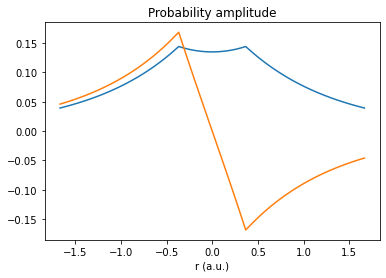

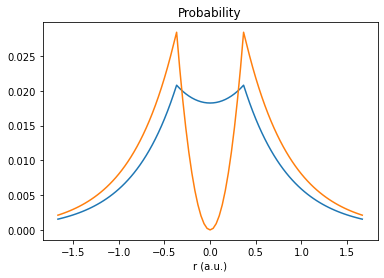

In [26]:
x = np.array([i for i in range(-50,51)])/30

def psi1s(x,rN):
    # an unnormalized 1s orbital in 1D
    return np.exp(-np.abs(x-rN))

def mo(x,rN_array,c):
    rA = rN_array[0]
    rB = rN_array[1]
    cA = c[0]
    cB = c[1]
    out = cA*psi1s(x,rA)+cB*psi1s(x,rB)
    norm = np.sqrt(np.sum(out**2))
    return out/norm

#the positions of the nuclei
rN_array= np.array([-Rab_min/2, Rab_min/2])

#the coefficients of the bonding MO sigma
c_sigma = np.array([1,1])/np.sqrt(2)

#the coefficients of the antibonding MO sigma*
c_sigma_star = np.array([1,-1])/np.sqrt(2)

#evaluate the bonding and antibonding MOs
sigma = mo(x,rN_array,c_sigma)
sigma_star = mo(x,rN_array,c_sigma_star)


plt.plot(x,sigma,x,sigma_star)
plt.title('Probability amplitude')
plt.xlabel('r (a.u.)')
plt.show()

plt.plot(x,sigma**2,x,sigma_star**2)
plt.title('Probability')
plt.xlabel('r (a.u.)')
plt.show()

B. Use the following code to plot the spatial part of the two-electron wavefunction $\psi_1(r_1,r_2) = \sigma(r_1)\sigma(r_2)$ as a function of the two coordinates, $r_1$ and $r_2$, in a two-dimensional contour plot.

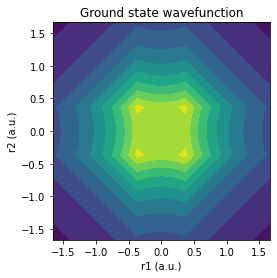

In [28]:
r1 = x
r2 = x
R1, R2 = np.meshgrid(r1,r2)

Psi1 = mo(R1,rN_array,c_sigma)*mo(R2,rN_array,c_sigma)

# plot the wavefunction 
n_levels = 10
plt.contourf(R1,R2,Psi1,n_levels)
plt.title('Ground state wavefunction')
plt.axis('square')
plt.xlabel('r1 (a.u.)')
plt.ylabel('r2 (a.u.)')
plt.show()

C. Add code below to plot one of the single excitations 

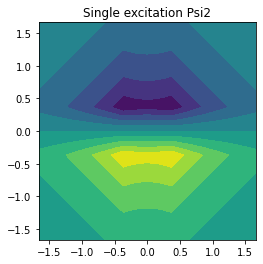

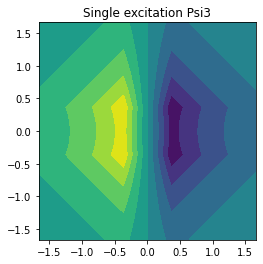

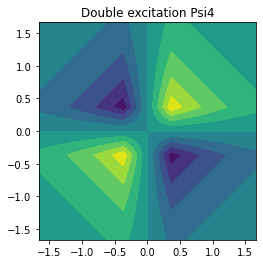

In [25]:
Psi2 = mo(R1,rN_array,c_sigma)*mo(R2,rN_array,c_sigma_star)
Psi3 = mo(R1,rN_array,c_sigma_star)*mo(R2,rN_array,c_sigma)
Psi4 = mo(R1,rN_array,c_sigma_star)*mo(R2,rN_array,c_sigma_star)


plt.contourf(R1,R2,Psi2,n_levels)
plt.title('Single excitation Psi2')
plt.axis('square')
plt.show()


plt.contourf(R1,R2,Psi3,n_levels)
plt.title('Single excitation Psi3')
plt.axis('square')
plt.show()


plt.contourf(R1,R2,Psi4,n_levels)
plt.title('Double excitation Psi4')
plt.axis('square')
plt.show()

### Thinking about the data: Part Two

23. In reference to the first plot: <br><br> a) Identify the positions of nucleus A and nucleus B and explain your reasoning.<br><br> b) Identify the curve representing $\sigma^*$ and explain your reasoning. <br><br> c) Identify the bond length according to this plot and explain how this result is consistent with the PES from part one. <br><br>

24. In reference to the second plot: <br><br> a) Identify the value of $r_1$ where $e_1$ is located on nucleus A.  <br><br> b) Identify the value of $r_2$ where $e_2$ is located on nucleus A.  <br><br> c) In which quadrant of the graph is $e_1$ on nucleus A and $e_2$ is on nucleus A? <br><br> d) Are the probabilities of case 1 or case 2 more representative of this graph? <br><br> e) How are electrons treated in this representation, correlated or uncorrelated?

25. What is missing in the Hartree-Fock description of the singlet state that makes it poorly suited to describe H$_2$ as $r_{AB}\rightarrow\infty$? <br><br>

Looking at the graphs above, identify the number of nodes in Psi2 through Psi4.

Now, let's mix the ground state and the doubly excited state by taking linear combinations of the determinants.

$$
\Psi_\pm = \Psi_1\pm\Psi_4
$$

and look at the resulting two-particle wavefunctions.

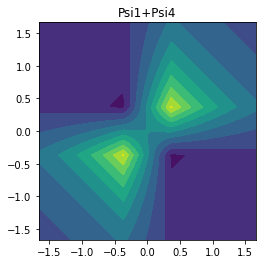

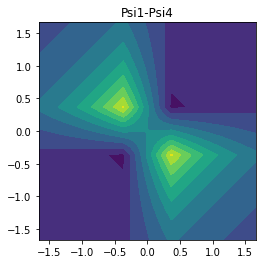

In [33]:
plt.contourf(R1,R2,Psi1+Psi4,n_levels)
plt.title('Psi1+Psi4')
plt.axis('square')
plt.show()

plt.contourf(R1,R2,Psi1-Psi4,n_levels)
plt.title('Psi1-Psi4')
plt.axis('square')
plt.show()

In $\Psi_+$, if electron 1 is on nucleus A, where is electron 2 most likely to be found?

In $\Psi_-$, if electron 1 is on nucleus A, where is electron 2 most likely to be found?

How many nodes are in these wavefunctions?

Which wavefunction, $\Psi_+$ or $\Psi_-$, best reproduces scenario 2 above?

What would the other wavefunction represent?

In your own words, explain how adding multiple determinants can introduce electron correlation to the HF wavefunction.



### Information

Configuration interaction (CI) calculations treat the wavefunction as a combination of multiple (sometimes very many!) determinants. For H$_2$ in a minimal basis, only single and double excitations are possible because there are only two electrons. CI with single and double excitations is called CISD.

A wavefunction is constructed as a linear combination of determinants, and the variational principle is again used to find the lowest energy.

Mixing configurations of the ground state (Hartree-Fock) single determinant with the doubly excited $\Psi_4$ is called CI doubles, or CID.
$$
\Psi_\textrm{CI} = c_1\Psi_1 + c_2\Psi_4
$$
Additional determinants at the level of singles gives CISD. Triples makes CISDT, quadruples are CISDTQ, and so forth.

Could say something about the orders -- singles don't mix with the ground state by symmetry (I htink the number of nodes argument above should suffice to motivate or maybe prove this) where the doubles can. The singles can mix with the doubles, though. 

Something about counting the number of possibilities?

### Pre-computation Questions: Part Three

### Computation: Part Three

In [ ]:
method = 'cisd'
psi4.core.set_output_file('output.dat', False)


e_singlet = scan(h2_singlet,rAB_list,method)
#print(e_singlet)

e_triplet = scan(h2_triplet,rAB_list,method)
#print(e_triplet)


# Visualize energy profile
x = rAB_list
y1 = e_singlet
y2 = e_triplet
plt.title('CISD (correlation)')
plt.plot(x,y1,'o-',x,y2,'-o')
plt.xlabel('H2 Bond Length')
plt.ylabel('Molecular Energy ($E_h$)')
plt.show()

print('done')
print(F'Energy at the minimum {np.min(e_singlet)} Eh')

### Thinking about the data: Part Three

Question: What is the energy difference between singlet and triplet states at rAB-> infinity? 

Which is better description of the dissociation of H$_2$, CISD or HF?

What is the energy at $r_{AB}\rightarrow\infty$? How does that compare with the exact result?

Look at the CISD energy of the ground state and compare to the HF energy? Which energy is more correct? Why?

What is the energy difference between HF and CISD in units of kcal/mol? (Hint: 1 Ha = 627.509 kcal mol-1.)

Which is better description of the bonding region of H$_2$, CISD or HF?

**Information** Any time multiple electron configurations become close in energy, HF is in trouble because it is built on a single determinant. 


## The correlation that HF gets correct -- exchange correlation

Let's return to the singly excited CSFs considering both space and spin.

If we have two MOs, each occupied by one electron, and each electron with two spins, how many ways of arranging the electrons are there?

The total wavefunction must be antisymmetric with respect to exchange. Because the wavefunction factorizes in to space and spin, either the spatial or spin parts of the wavefunction must be antisymmetric. If the spatial part is symmetric, the spin part must be antisymmetric and vice versa. The resulting combinations are a singlet and a three triplet states.

The open-shell singlet is
$$
^0\Psi = (\sigma(1)\sigma^*(2)+\sigma^*(1)\sigma(2))[\alpha(1)\beta(2)-\alpha(2)\beta(1)] 
$$
The three triplets are
\begin{align}
^3_1\Psi &= (\sigma(1)\sigma^*(2)-\sigma^*(1)\sigma(2))\alpha(1)\alpha(2)\\ 
^3_0\Psi &= (\sigma(1)\sigma^*(2)-\sigma^*(1)\sigma(2))[\alpha(1)\beta(2)+\alpha(2)\beta(1)] \\
^3_{-1}\Psi &= (\sigma(1)\sigma^*(2)-\sigma^*(1)\sigma(2))\beta(1)\beta(2)
\end{align}




In [ ]:
Psi_OSS = mo(R1,rN_array,c_sigma)*mo(R2,rN_array,c_sigma_star)+mo(R1,rN_array,c_sigma_star)*mo(R2,rN_array,c_sigma)
Psi_triplet = mo(R1,rN_array,c_sigma)*mo(R2,rN_array,c_sigma_star)-mo(R1,rN_array,c_sigma_star)*mo(R2,rN_array,c_sigma)


plt.figure()
plt.contourf(R1,R2,Psi_OSS)
plt.title('Psi_OSS')
plt.axis('square')

plt.figure()
plt.contourf(R1,R2,Psi_triplet)
plt.title('Psi_triplet')
plt.axis('square')


Which of the two wavefunctions localizes the electrons on opposite nuclei? 

Which puts them on the same nuclei?

How many nodes are there in these wavefunctions?

In the $^3_1\Psi$, the cancellation of electrons is called a "Fermi hole." Because, for a triplet, the spins are identical, the spatial part of the wavefunction must have the minus sign, and the electrons cannot be in the same location. The triplet energy is correct because of this cancellation.

Notice that the open-shell singlet tends to pair the electrons, in what is called a "Fermi heap." Propose a physical interpretation of the open-shell singlet state.





## Correlation in the bonding region
HF failed spectacularly to describe the dissociation of H$_2$. It is much better in the bonding regions, but chemical accuracy often requires incorporating additional electron correlation effects. 


TO DO: Propose some molecules and look at changes in the bonding properties?


## Other approaches to adding electron correlation
### CI S D T Q H ... Full CI
Systematic improvements but the number of determinants grows really fast, so this is a mess.

### MP2
It involves the double excitations! 

Nonvariational nature means it tends to overestimate corrections.

### Coupled-Cluster
A way to get higher orders of single- and double-excitation operators...

It is not variational but seems very close to the variational results for reasons that are beyond me. 

## Dispersion interactions are electron correlation effects



In [ ]:

# singlet H2 has a charge of 0, spin multiplicity of 1 (m_s=0)
he_dimer = """
0 1
He 
He 1 {}
"""

be_dimer = """
0 1
Be 
Be 1 {}
"""

ar_dimer = """
0 1
Ar 
Ar 1 {}
"""


# for He
rAB_list = [2.75, 2.87, 3, 3.5, 4, 10]

# for Ar
rAB_list = [3.5, 3.75, 4, 4.5, 5, 6, 10]

print(rAB_list)

def scan(geom,rAB,method='SCF',basis='sto-3g'):
    t_start = time.perf_counter()
    
    # set computation options
    psi4.set_options({'basis': basis,
                  'reference': 'rohf'})

    e = ['']*len(rAB)
    count = -1
    for rAB in rAB_list:
        #print(rAB)
        count = count+1
        mol = psi4.geometry(geom.format(rAB))
        e[count] = psi4.energy(method,molecule=mol)
        
    t_diff = time.perf_counter() - t_start
    #print(F'Energy at the minimum {np.min(e)} Eh located at {rAB_list[np.argmin(e)]} a0')
    r_min = rAB_list[np.argmin(e)]
    e_min = np.min(e)
    de = e_min - e[-1]
    print(F'\nr_min/a0\tE_min/a.u.\tdE/a.u.')
    #print(F'{r_min}\t{e_min}\t{de}')
    print('%8.5f\t%8.3f\t%8.6f' % (r_min, e_min, de))
    print(F'\n{method} time elapsed {t_diff} s')
    psi4.core.clean()
    return e

def listdiff(e,ind=-1):
    return list(np.array(e)-np.array(e[ind]))

mol = ar_dimer

basis = 'cc-pVTZ'
#basis = 'cc-pVDZ'

method = 'SCF'
t_start = time.perf_counter()
e_hf = scan(mol,rAB_list,method,basis)
#print(e_hf)

method = 'MP2' #1.5 times slower
e_mp2 = scan(mol,rAB_list,method,basis)
#print(e_mp2)

method = 'CCSD' #10 times slower
e_ccsd = scan(mol,rAB_list,method,basis)
#print(e_ccsd)

method = 'CISD' #100 times slower
e_cisd = scan(mol,rAB_list,method,basis)
#print(e_cisd)


# Visualize energy profile
x = rAB_list
#y1 = list(np.array(e_hf)-np.array(e_hf[-1]))
y1 = listdiff(e_hf)
y2 = listdiff(e_mp2)
y3 = listdiff(e_ccsd)
y4 = listdiff(e_cisd)
plt.title('PES')
plt.plot(x,y1,'o-')
plt.plot(x,y2,'-o')
plt.plot(x,y3,'-o')
plt.plot(x,y4,'-o')
plt.xlabel('rAB')
plt.ylabel('Molecular Energy ($E_h$)')
plt.legend(('SCF','MP2','CCSD','CISD'))
plt.show()

print('done')

